In [1]:
#importing diffrent required Libraries
import numpy as np
import pandas as pd
from datetime import timedelta
from datetime import date
import random
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading dataset
df=pd.read_csv("1806055.csv")
df.head()#visualizing top 5 rows of dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR foundation,2019-01-22 00:00:00,2019.0,1.928608e+09,2019-01-11,20190111,20190111,20190126.0,USD,RV,1.0,NaN,44855.80,20190111.0,NAH4,1.928608e+09,0
1,U001,0200974851,RESTA co,2019-10-23 00:00:00,2019.0,1.929958e+09,2019-10-03,20191003,20191003,20191018.0,USD,RV,1.0,NaN,150.98,20191003.0,NAA8,1.929958e+09,0
2,U001,0200700919,US in,2019-11-04 00:00:00,2019.0,1.930013e+09,2019-10-19,20191016,20191019,20191103.0,USD,RV,1.0,NaN,9741.14,20191019.0,NAA8,1.930013e+09,0
3,U001,0200762301,C&S WH trust,2019-10-16 00:00:00,2019.0,1.929940e+09,2019-09-30,20190929,20190930,20191015.0,USD,RV,1.0,NaN,15094.78,20190930.0,NAC6,1.929940e+09,0
4,U001,0200792293,UNIFIE us,2019-01-25 00:00:00,2019.0,1.928608e+09,2019-01-10,20190111,20190110,20190125.0,USD,RV,1.0,NaN,19009.87,20190110.0,NAA8,1.928608e+09,0


In [4]:
#checking rows and columns
df.shape

(50000, 19)

In [5]:
#collecting information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45645 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
#dropping duplicate rows/tuples with same data

df.drop_duplicates(subset=['cust_number','name_customer','clear_date','document_create_date.1','due_in_date','total_open_amount','baseline_create_date'], keep='first', inplace=True, ignore_index=False)

In [7]:
df.shape

(49983, 19)

In [8]:
#PREPROCESSING

In [9]:
#checking for null datas in our dataset

df.isnull()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49996,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49997,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49998,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [10]:
#checking sum of the null datas of the columns in our dataset

df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4352
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             49983
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [11]:
#check if null values are those of open invoices
df.isOpen.value_counts()

0    45631
1     4352
Name: isOpen, dtype: int64

In [12]:
[col for col in df.columns if df[col].isnull().sum()>0]

['clear_date', 'area_business', 'invoice_id']

In [13]:
#Checking area Business Column
df['area_business']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: area_business, Length: 49983, dtype: float64

In [14]:
#dropping area_buiseness column because it contains only null values

df.drop(['area_business'],axis=1,inplace=True)

In [15]:
#checking no of unique values of invoice id
df['invoice_id'].value_counts()

1.930662e+09    1
1.929410e+09    1
1.928926e+09    1
1.929661e+09    1
1.929661e+09    1
               ..
1.930518e+09    1
1.929292e+09    1
1.929758e+09    1
1.930585e+09    1
1.930303e+09    1
Name: invoice_id, Length: 49979, dtype: int64

In [16]:
#as invoice_id contains all unique values so we are dropping this column

df.drop(['invoice_id'],axis=1,inplace=True)

In [17]:
df['document type'].value_counts()

RV    49979
X2        4
Name: document type, dtype: int64

In [18]:
#check the values of clear_date
df.clear_date.head()

0    2019-01-22 00:00:00
1    2019-10-23 00:00:00
2    2019-11-04 00:00:00
3    2019-10-16 00:00:00
4    2019-01-25 00:00:00
Name: clear_date, dtype: object

In [19]:
#check the values of due_in_date
df.due_in_date.head()

0    20190126.0
1    20191018.0
2    20191103.0
3    20191015.0
4    20190125.0
Name: due_in_date, dtype: float64

In [20]:
#check the values of document_create_date.1
df['document_create_date.1'].head()

0    20190111
1    20191003
2    20191019
3    20190930
4    20190110
Name: document_create_date.1, dtype: int64

In [21]:
#check the values of baseline_create_date
df['baseline_create_date'].head()

0    20190111.0
1    20191003.0
2    20191019.0
3    20190930.0
4    20190110.0
Name: baseline_create_date, dtype: float64

In [22]:
#convert dates into datetime objects
df['clear_date'] = pd.to_datetime(df['clear_date'])
df["due_in_date"] = pd.to_datetime(df["due_in_date"],format="%Y%m%d")
df["document_create_date.1"] = pd.to_datetime(df["document_create_date.1"],format="%Y%m%d")
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format="%Y%m%d")

In [23]:
#extract weeks from datetime objects
df['due_in_date_week'] = df['due_in_date'].dt.week
df['posting_date_week'] = df['posting_date'].dt.week
df['baseline_create_date_week'] = df['baseline_create_date'].dt.week
duration =  df['due_in_date']-df['baseline_create_date']
df['duration']=duration.dt.days

In [24]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration
0,U001,0200769623,WAL-MAR foundation,2019-01-22,2019.0,1.928608e+09,2019-01-11,20190111,2019-01-11,2019-01-26,...,RV,1.0,44855.80,2019-01-11,NAH4,0,4,2,2,15
1,U001,0200974851,RESTA co,2019-10-23,2019.0,1.929958e+09,2019-10-03,20191003,2019-10-03,2019-10-18,...,RV,1.0,150.98,2019-10-03,NAA8,0,42,40,40,15
2,U001,0200700919,US in,2019-11-04,2019.0,1.930013e+09,2019-10-19,20191016,2019-10-19,2019-11-03,...,RV,1.0,9741.14,2019-10-19,NAA8,0,44,42,42,15
3,U001,0200762301,C&S WH trust,2019-10-16,2019.0,1.929940e+09,2019-09-30,20190929,2019-09-30,2019-10-15,...,RV,1.0,15094.78,2019-09-30,NAC6,0,42,40,40,15
4,U001,0200792293,UNIFIE us,2019-01-25,2019.0,1.928608e+09,2019-01-10,20190111,2019-01-10,2019-01-25,...,RV,1.0,19009.87,2019-01-10,NAA8,0,4,2,2,15


In [25]:
# document_create_date.1 is normalised form of document_date_create, we can drop this column

df.drop(['document_create_date'],axis=1,inplace=True)
df.shape

(49983, 20)

In [26]:
#'document_create_date.1' cannot be greater than 'due_in_date' .
#This is an anomaly and should be removed.
df[df['document_create_date.1']>df['due_in_date']].shape[0]

153

In [27]:
anomaly =df[df['document_create_date.1']>df['due_in_date']]
anomaly

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration
23,CA02,0140104423,METRO llc,2019-08-01,2019.0,2.960563e+09,2019-07-29,2019-07-29,2019-07-20,CAD,RV,1.0,84707.30,2019-07-10,CA10,0,29,31,28,10
1304,U001,0200455322,PEA,2019-03-11,2019.0,1.928884e+09,2019-03-01,2019-03-01,2019-02-28,USD,RV,1.0,7417.01,2019-01-29,NAD5,0,9,9,5,30
1503,U001,0200803720,DEC,2019-06-12,2019.0,1.929467e+09,2019-06-11,2019-06-11,2019-06-08,USD,RV,1.0,5558.93,2019-06-01,NAM1,0,23,24,22,7
1620,U001,0200592182,DECA,2019-05-29,2019.0,1.929395e+09,2019-05-29,2019-05-29,2019-05-26,USD,RV,1.0,1836.12,2019-05-16,NAM2,0,21,22,20,10
2371,U001,0200455322,PEA corporation,2019-02-22,2019.0,1.928824e+09,2019-02-19,2019-02-19,2019-02-17,USD,RV,1.0,10767.31,2019-01-18,NAD5,0,7,8,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48629,U001,0200803720,DEC co,NaT,2020.0,1.930824e+09,2020-04-24,2020-04-24,2020-04-23,USD,RV,1.0,22205.67,2020-04-16,NAM1,1,17,17,16,7
48676,U001,0200416837,DEC associates,NaT,2020.0,1.930814e+09,2020-04-22,2020-04-22,2020-03-26,USD,RV,1.0,15588.24,2020-03-16,NAM2,1,13,17,12,10
48792,U001,0200416837,DEC llc,NaT,2020.0,1.930815e+09,2020-04-22,2020-04-22,2020-03-26,USD,RV,1.0,8549.49,2020-03-16,NAM2,1,13,17,12,10
49130,CA02,0140106408,WAL-M corp,NaT,2020.0,2.960627e+09,2020-04-06,2020-04-06,2020-03-29,CAD,RV,1.0,818.40,2020-03-19,CA10,1,13,15,12,10


In [28]:
#removing unnecessary data
indexNames = df[df['document_create_date.1']>df['due_in_date']].index
df.drop(indexNames , inplace=True)
df.shape

(49830, 20)

In [29]:
#checking anomalies where clear_date comes before document_create_date.1

c=0
for i in (df['clear_date']-df['document_create_date.1']).dt.days:
    if (i<0):
        c+=1
print("There are",c,"rows where clear_date is before creation date.")

There are 0 rows where clear_date is before creation date.


In [30]:
#SLICING CLEAR DATE = NULL VALUES

In [31]:
##creating test Set 1 which contains null values of clear date
df2=df[df.clear_date.isnull()].reset_index(drop=True)
df2

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration
0,U001,0200759878,SA foundation,NaT,2020.0,1.930599e+09,2020-03-03,2020-03-03,2020-03-18,USD,RV,1.0,32474.93,2020-03-03,NAH4,1,12,10,10,15
1,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930676e+09,2020-03-21,2020-03-21,2020-04-05,USD,RV,1.0,28053.64,2020-03-21,NAH4,1,14,12,12,15
2,U001,0200418007,AM associates,NaT,2020.0,1.930698e+09,2020-03-29,2020-03-29,2020-04-13,USD,RV,1.0,5066.72,2020-03-29,NAA8,1,16,13,13,15
3,U001,0200742791,QUI trust,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-06-19,USD,RV,1.0,44.14,2020-04-15,NAGD,1,25,16,16,65
4,U001,0200418007,AM foundation,NaT,2020.0,1.930587e+09,2020-03-02,2020-03-02,2020-03-17,USD,RV,1.0,111543.49,2020-03-02,NAA8,1,12,10,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930597e+09,2020-03-03,2020-03-03,2020-03-18,USD,RV,1.0,43180.24,2020-03-03,NAH4,1,12,10,10,15
4332,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930726e+09,2020-04-01,2020-04-01,2020-04-16,USD,RV,1.0,498.03,2020-04-01,NAH4,1,16,14,14,15
4333,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930859e+09,2020-05-07,2020-05-07,2020-05-22,USD,RV,1.0,44776.03,2020-05-07,NAH4,1,21,19,19,15
4334,U001,0200794332,COST llc,NaT,2020.0,1.930622e+09,2020-03-09,2020-03-09,2020-03-24,USD,RV,1.0,48451.41,2020-03-09,NAAX,1,13,11,11,15


In [32]:
#creating big set which contains not null values of clear date
data=df[df.clear_date.notnull()].reset_index(drop=True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration
0,U001,0200769623,WAL-MAR foundation,2019-01-22,2019.0,1.928608e+09,2019-01-11,2019-01-11,2019-01-26,USD,RV,1.0,44855.80,2019-01-11,NAH4,0,4,2,2,15
1,U001,0200974851,RESTA co,2019-10-23,2019.0,1.929958e+09,2019-10-03,2019-10-03,2019-10-18,USD,RV,1.0,150.98,2019-10-03,NAA8,0,42,40,40,15
2,U001,0200700919,US in,2019-11-04,2019.0,1.930013e+09,2019-10-19,2019-10-19,2019-11-03,USD,RV,1.0,9741.14,2019-10-19,NAA8,0,44,42,42,15
3,U001,0200762301,C&S WH trust,2019-10-16,2019.0,1.929940e+09,2019-09-30,2019-09-30,2019-10-15,USD,RV,1.0,15094.78,2019-09-30,NAC6,0,42,40,40,15
4,U001,0200792293,UNIFIE us,2019-01-25,2019.0,1.928608e+09,2019-01-10,2019-01-10,2019-01-25,USD,RV,1.0,19009.87,2019-01-10,NAA8,0,4,2,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45489,U001,0200466603,SMITH'S corp,2019-02-22,2019.0,1.928760e+09,2019-02-07,2019-02-07,2019-02-22,USD,RV,1.0,93318.51,2019-02-07,NAA8,0,8,6,6,15
45490,U001,0100054194,MONOGR corp,2019-11-13,2019.0,1.930068e+09,2019-11-01,2019-11-01,2019-12-23,USD,RV,1.0,25802.18,2019-11-01,B052,0,52,44,44,52
45491,U001,0200416837,DEC foundation,2019-11-18,2019.0,1.930100e+09,2019-11-05,2019-11-05,2019-11-24,USD,RV,1.0,5822.40,2019-11-01,NAM4,0,47,45,44,23
45492,U001,0200759878,SA corp,2019-04-17,2019.0,1.929056e+09,2019-04-01,2019-04-01,2019-04-16,USD,RV,1.0,13768.73,2019-04-01,NAH4,0,16,14,14,15


In [33]:
data.shape

(45494, 20)

In [34]:
#label encoding
label_encoder = preprocessing.LabelEncoder() 
data['business_code']= label_encoder.fit_transform(data['business_code'])
data['cust_payment_terms']= label_encoder.fit_transform(data['cust_payment_terms'])
data['invoice_currency']= label_encoder.fit_transform(data['invoice_currency'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration
0,1,0200769623,WAL-MAR foundation,2019-01-22,2019.0,1.928608e+09,2019-01-11,2019-01-11,2019-01-26,1,RV,1.0,44855.80,2019-01-11,33,0,4,2,2,15
1,1,0200974851,RESTA co,2019-10-23,2019.0,1.929958e+09,2019-10-03,2019-10-03,2019-10-18,1,RV,1.0,150.98,2019-10-03,19,0,42,40,40,15
2,1,0200700919,US in,2019-11-04,2019.0,1.930013e+09,2019-10-19,2019-10-19,2019-11-03,1,RV,1.0,9741.14,2019-10-19,19,0,44,42,42,15
3,1,0200762301,C&S WH trust,2019-10-16,2019.0,1.929940e+09,2019-09-30,2019-09-30,2019-10-15,1,RV,1.0,15094.78,2019-09-30,24,0,42,40,40,15
4,1,0200792293,UNIFIE us,2019-01-25,2019.0,1.928608e+09,2019-01-10,2019-01-10,2019-01-25,1,RV,1.0,19009.87,2019-01-10,19,0,4,2,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45489,1,0200466603,SMITH'S corp,2019-02-22,2019.0,1.928760e+09,2019-02-07,2019-02-07,2019-02-22,1,RV,1.0,93318.51,2019-02-07,19,0,8,6,6,15
45490,1,0100054194,MONOGR corp,2019-11-13,2019.0,1.930068e+09,2019-11-01,2019-11-01,2019-12-23,1,RV,1.0,25802.18,2019-11-01,1,0,52,44,44,52
45491,1,0200416837,DEC foundation,2019-11-18,2019.0,1.930100e+09,2019-11-05,2019-11-05,2019-11-24,1,RV,1.0,5822.40,2019-11-01,36,0,47,45,44,23
45492,1,0200759878,SA corp,2019-04-17,2019.0,1.929056e+09,2019-04-01,2019-04-01,2019-04-16,1,RV,1.0,13768.73,2019-04-01,33,0,16,14,14,15


In [35]:
#IDENTIFYING TARGET COLUMN

In [36]:
#add target column and extracting non-zero values
delta = data["clear_date"]-data["due_in_date"]
data['target'] = delta.dt.days
data# = data[data.target > 0]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration,target
0,1,0200769623,WAL-MAR foundation,2019-01-22,2019.0,1.928608e+09,2019-01-11,2019-01-11,2019-01-26,1,...,1.0,44855.80,2019-01-11,33,0,4,2,2,15,-4
1,1,0200974851,RESTA co,2019-10-23,2019.0,1.929958e+09,2019-10-03,2019-10-03,2019-10-18,1,...,1.0,150.98,2019-10-03,19,0,42,40,40,15,5
2,1,0200700919,US in,2019-11-04,2019.0,1.930013e+09,2019-10-19,2019-10-19,2019-11-03,1,...,1.0,9741.14,2019-10-19,19,0,44,42,42,15,1
3,1,0200762301,C&S WH trust,2019-10-16,2019.0,1.929940e+09,2019-09-30,2019-09-30,2019-10-15,1,...,1.0,15094.78,2019-09-30,24,0,42,40,40,15,1
4,1,0200792293,UNIFIE us,2019-01-25,2019.0,1.928608e+09,2019-01-10,2019-01-10,2019-01-25,1,...,1.0,19009.87,2019-01-10,19,0,4,2,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45489,1,0200466603,SMITH'S corp,2019-02-22,2019.0,1.928760e+09,2019-02-07,2019-02-07,2019-02-22,1,...,1.0,93318.51,2019-02-07,19,0,8,6,6,15,0
45490,1,0100054194,MONOGR corp,2019-11-13,2019.0,1.930068e+09,2019-11-01,2019-11-01,2019-12-23,1,...,1.0,25802.18,2019-11-01,1,0,52,44,44,52,-40
45491,1,0200416837,DEC foundation,2019-11-18,2019.0,1.930100e+09,2019-11-05,2019-11-05,2019-11-24,1,...,1.0,5822.40,2019-11-01,36,0,47,45,44,23,-6
45492,1,0200759878,SA corp,2019-04-17,2019.0,1.929056e+09,2019-04-01,2019-04-01,2019-04-16,1,...,1.0,13768.73,2019-04-01,33,0,16,14,14,15,1


In [37]:
#bin target values for reference
bins = np.array([0,15,30,45,60,75])
data['aging_bucket'] = pd.cut(data.target, bins)
data['aging_bucket'].value_counts()

(0, 15]     17498
(15, 30]      607
(30, 45]      451
(45, 60]      306
(60, 75]      103
Name: aging_bucket, dtype: int64

In [38]:
#sorting the document_create_date.1 column according to their values

data.sort_values(by='document_create_date.1',inplace=True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,due_in_date_week,posting_date_week,baseline_create_date_week,duration,target,aging_bucket
11028,1,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,...,18158.02,2018-12-30,33,0,3,52,52,15,-5,NaN
32987,1,0200769623,WAL-MAR corp,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,1,...,18703.02,2018-12-30,33,0,3,52,52,15,1,"(0.0, 15.0]"
9499,1,0200706844,WINC corp,2019-01-14,2019.0,1.928521e+09,2018-12-30,2018-12-30,2019-01-14,1,...,9577.44,2018-12-30,19,0,3,52,52,15,0,NaN
7652,1,0200744019,TARG systems,2019-01-18,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,...,1176.00,2018-12-30,19,0,3,52,52,15,4,"(0.0, 15.0]"
25686,1,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,1,...,242.06,2018-12-30,33,0,3,52,52,15,-5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16486,1,0200714710,SYSCO us,2020-03-13,2020.0,1.930565e+09,2020-02-26,2020-02-26,2020-03-12,1,...,57668.67,2020-02-26,19,0,11,9,9,15,1,"(0.0, 15.0]"
3561,1,0200769623,WAL-MAR systems,2020-03-16,2020.0,1.930566e+09,2020-02-26,2020-02-26,2020-03-12,1,...,12031.71,2020-02-26,33,0,11,9,9,15,4,"(0.0, 15.0]"
15850,1,0200186937,SYSC associates,2020-03-16,2020.0,1.930577e+09,2020-02-26,2020-02-26,2020-03-12,1,...,44858.71,2020-02-26,19,0,11,9,9,15,4,"(0.0, 15.0]"
12839,1,0200799367,MCL us,2020-03-12,2020.0,1.930553e+09,2020-02-26,2020-02-26,2020-03-12,1,...,12627.07,2020-02-26,19,0,11,9,9,15,0,NaN


In [39]:
#TRAIN TEST SPLIT

In [40]:
#spliting data into train set

train_set, temp_set = train_test_split(data,test_size=.30,shuffle=False,random_state=0)
train_set.shape,temp_set.shape

((31845, 22), (13649, 22))

In [41]:
#spliting temp_set into validation set and test set

validation_set,test_set=train_test_split(temp_set,test_size=.50,shuffle=False,random_state=0)
validation_set.shape,test_set.shape

((6824, 22), (6825, 22))

In [42]:
#checking unique values of all features

for col in train_set.columns:
    print(f'There are {train_set[col].unique().shape[0]} unique values in {col}')

There are 6 unique values in business_code
There are 1291 unique values in cust_number
There are 3572 unique values in name_customer
There are 282 unique values in clear_date
There are 1 unique values in buisness_year
There are 31845 unique values in doc_id
There are 282 unique values in posting_date
There are 282 unique values in document_create_date.1
There are 345 unique values in due_in_date
There are 2 unique values in invoice_currency
There are 2 unique values in document type
There are 1 unique values in posting_id
There are 29118 unique values in total_open_amount
There are 292 unique values in baseline_create_date
There are 58 unique values in cust_payment_terms
There are 1 unique values in isOpen
There are 51 unique values in due_in_date_week
There are 42 unique values in posting_date_week
There are 45 unique values in baseline_create_date_week
There are 25 unique values in duration
There are 175 unique values in target
There are 6 unique values in aging_bucket


In [43]:
# most rows have same value for business_year

print(train_set['buisness_year'].value_counts())
print("{:.3f}".format(train_set['buisness_year'].var()),"is variance of column.")

2019.0    31845
Name: buisness_year, dtype: int64
0.000 is variance of column.


In [44]:
# Since isOpen , posting_id have only 1 unique value in train set we can drop this columns
# Since the variance is quite low, we may treat buisness_year as a quasi constant feature and drop it.
drop_cols = ['isOpen','buisness_year','posting_id']
train_set = train_set.drop(drop_cols,axis=1,inplace=False)

In [45]:
train_set

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,due_in_date_week,posting_date_week,baseline_create_date_week,duration,target,aging_bucket
11028,1,0200769623,WAL-MAR us,2019-01-09,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,18158.02,2018-12-30,33,3,52,52,15,-5,NaN
32987,1,0200769623,WAL-MAR corp,2019-01-15,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,18703.02,2018-12-30,33,3,52,52,15,1,"(0.0, 15.0]"
9499,1,0200706844,WINC corp,2019-01-14,1.928521e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,9577.44,2018-12-30,19,3,52,52,15,0,NaN
7652,1,0200744019,TARG systems,2019-01-18,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,1176.00,2018-12-30,19,3,52,52,15,4,"(0.0, 15.0]"
25686,1,0200769623,WAL-MAR trust,2019-01-09,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,242.06,2018-12-30,33,3,52,52,15,-5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28709,1,0200759878,SA,2019-10-23,1.929976e+09,2019-10-07,2019-10-07,2019-10-22,1,RV,8111.03,2019-10-07,33,43,41,41,15,1,"(0.0, 15.0]"
29562,1,0200748108,KROGER us,2019-10-22,1.929977e+09,2019-10-07,2019-10-07,2019-10-22,1,RV,48316.66,2019-10-07,19,43,41,41,15,0,NaN
30963,0,0140104285,BUY-,2019-10-21,2.960585e+09,2019-10-07,2019-10-07,2019-10-26,0,RV,31467.82,2019-10-16,5,43,41,42,10,-5,NaN
17938,1,0200775660,EB in,2019-10-22,1.929977e+09,2019-10-07,2019-10-07,2019-10-22,1,RV,113367.77,2019-10-07,19,43,41,41,15,0,NaN


In [46]:
#EDA

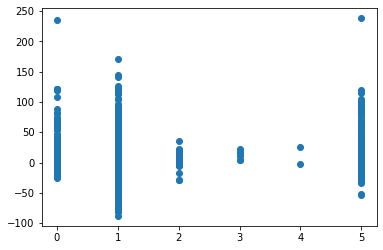

In [47]:
#relation between encoded business_code and target
plt.scatter(train_set['business_code'],train_set['target'])

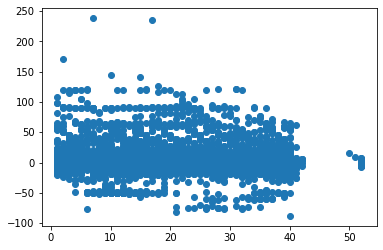

In [48]:
#relation between baseline_create_date_week and target
plt.scatter(train_set['baseline_create_date_week'],train_set['target'])

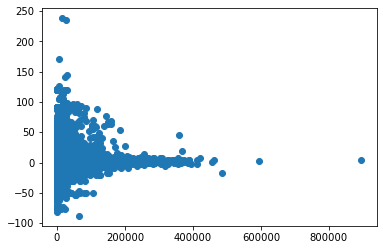

In [49]:
#relation between total_open_amount and target
plt.scatter(train_set['total_open_amount'],train_set['target'])

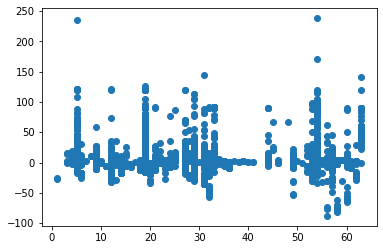

In [50]:
#relation between encoded cust_payment_terms and target
plt.scatter(train_set['cust_payment_terms'],train_set['target'])

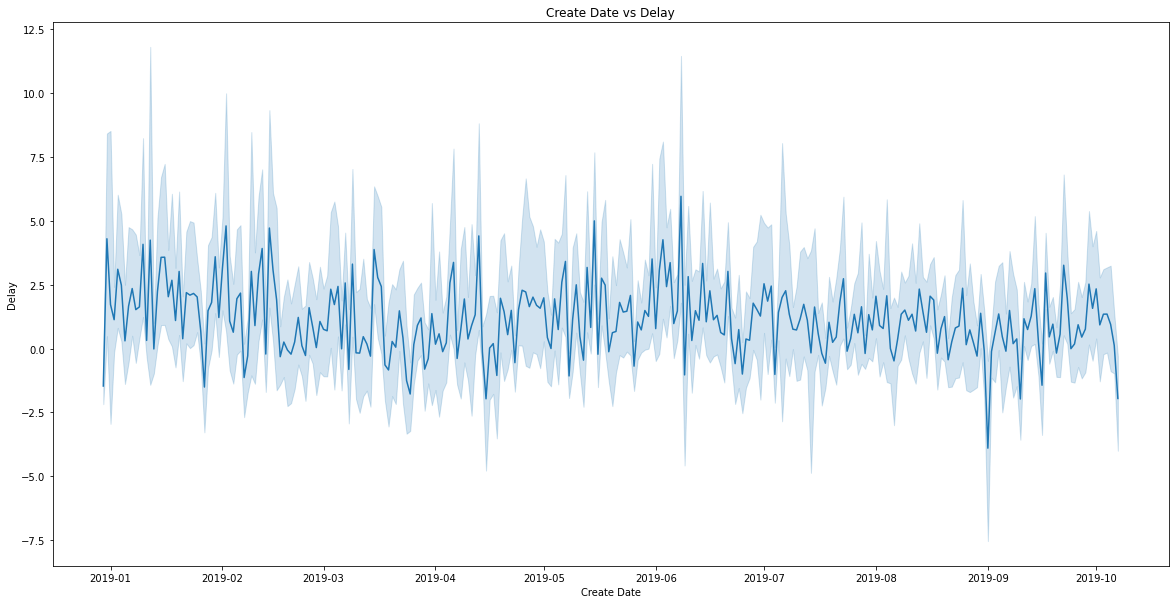

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(train_set['document_create_date.1'], train_set['target'])
plt.xlabel("Create Date")
plt.ylabel("Delay")
plt.title("Create Date vs Delay")
plt.show()

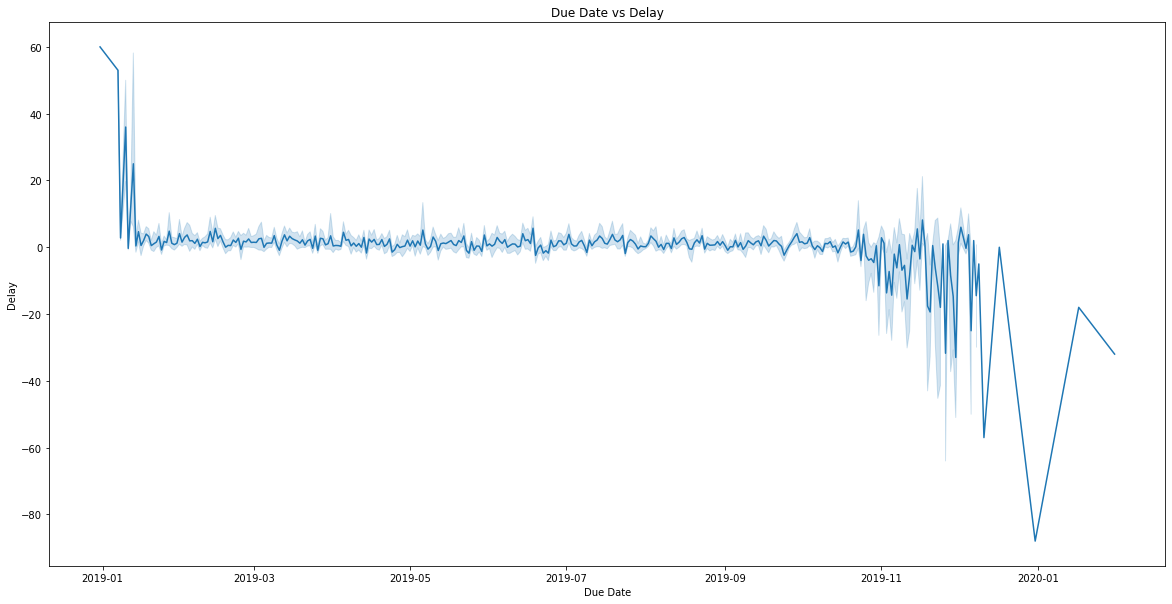

In [52]:
#we can see starting of the customers take some more time to pay their due ammount as compare to end of the year where customers take less time to pay their due ammount

plt.figure(figsize=(20,10))
sns.lineplot(train_set['due_in_date'], train_set['target'])
plt.xlabel("Due Date")
plt.ylabel("Delay")
plt.title("Due Date vs Delay")
plt.show()

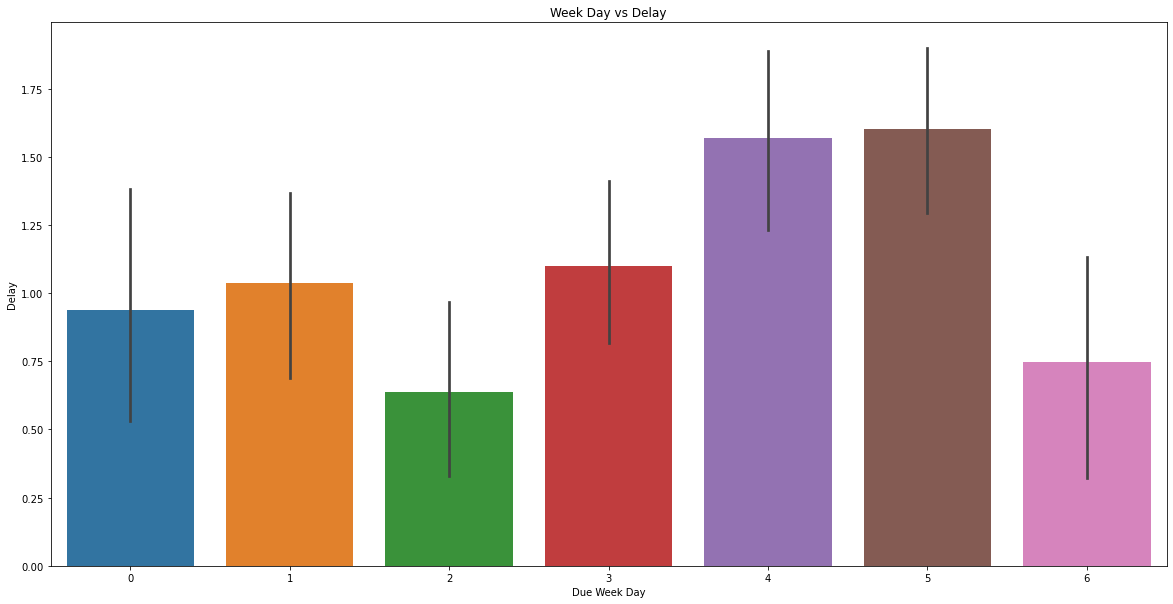

In [53]:
#as we can see customers take more time to pay their due amount on thursday

plt.figure(figsize=(20,10))
sns.barplot(train_set['due_in_date'].dt.dayofweek, train_set['target'])
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

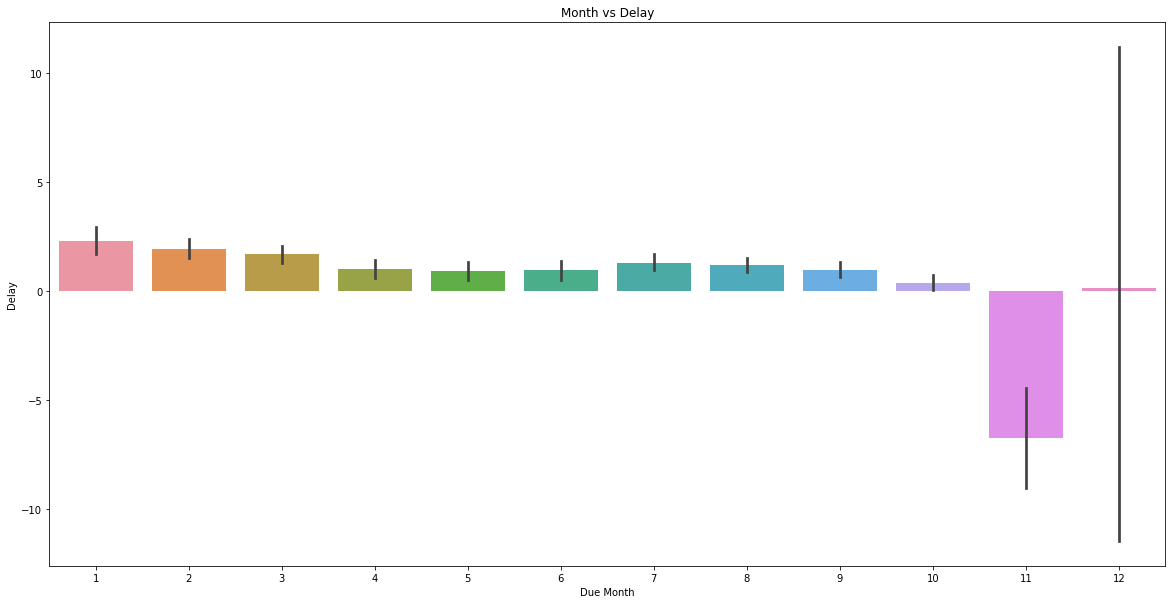

In [54]:
#we can see customers take much time to pay their due amount in december and take lesser time than their due_date in november

plt.figure(figsize=(20,10))
sns.barplot(train_set['due_in_date'].dt.month, train_set['target'])
plt.xlabel("Due Month")
plt.ylabel("Delay")
plt.title("Month vs Delay")
plt.show()

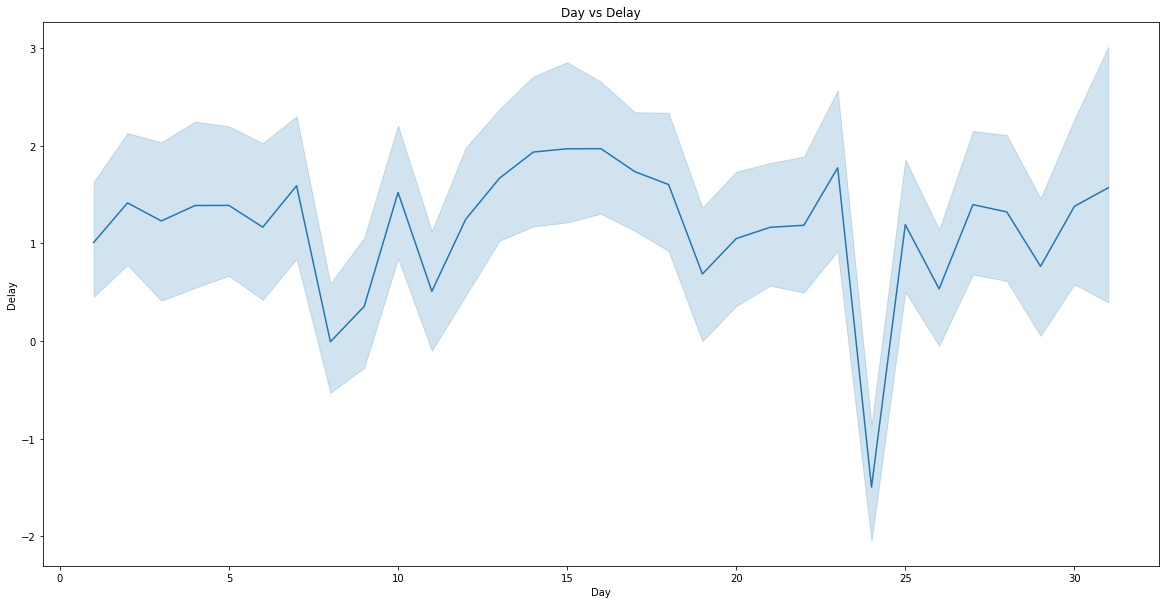

In [55]:
#we can see customers take lesser time to pay their due amount during the period of 20-25 days of any month

plt.figure(figsize=(20,10))
sns.lineplot(train_set['due_in_date'].dt.day, train_set['target'])
plt.xlabel("Day")
plt.ylabel("Delay")
plt.title("Day vs Delay")
plt.show()

In [56]:
#FEATURE ENGINEERING

In [57]:
print(train_set['invoice_currency'].value_counts())

1    29313
0     2532
Name: invoice_currency, dtype: int64


In [58]:
#We can see median delay of CAD is greater than USD
#We can conclude customer paying in CAD tend to delay more
train_set.groupby(['invoice_currency'])['target'].median()
#train_set.head()

invoice_currency
0    4
1    0
Name: target, dtype: int64

In [59]:
train_set.groupby('duration')['target'].median()

duration
0      42.0
7       2.0
10      3.0
15      0.0
16      0.0
20      0.0
23     -8.0
25      0.0
26      2.0
28     -8.0
30      3.0
31     -3.5
32      0.0
34    -19.0
35      8.0
40      0.0
45      2.0
52    -26.0
56      1.0
60      3.0
65      0.0
66     -6.0
75      0.0
90      0.0
120     0.5
Name: target, dtype: float64

In [60]:
train_set.groupby('invoice_currency')['total_open_amount'].median()

invoice_currency
0    30823.355
1    16420.040
Name: total_open_amount, dtype: float64

In [61]:
train_set.groupby('cust_number')['target'].median()

cust_number
0100000048    39.0
0100000051    -3.0
0100000158    19.0
0100000161     0.0
0100000217    -2.0
              ... 
CC7470        99.0
CCCA02         9.0
CCU001         9.0
CCU002         6.0
CCU013        43.0
Name: target, Length: 1291, dtype: float64

In [62]:
train_set

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,due_in_date_week,posting_date_week,baseline_create_date_week,duration,target,aging_bucket
11028,1,0200769623,WAL-MAR us,2019-01-09,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,18158.02,2018-12-30,33,3,52,52,15,-5,NaN
32987,1,0200769623,WAL-MAR corp,2019-01-15,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,18703.02,2018-12-30,33,3,52,52,15,1,"(0.0, 15.0]"
9499,1,0200706844,WINC corp,2019-01-14,1.928521e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,9577.44,2018-12-30,19,3,52,52,15,0,NaN
7652,1,0200744019,TARG systems,2019-01-18,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,1176.00,2018-12-30,19,3,52,52,15,4,"(0.0, 15.0]"
25686,1,0200769623,WAL-MAR trust,2019-01-09,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,1,RV,242.06,2018-12-30,33,3,52,52,15,-5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28709,1,0200759878,SA,2019-10-23,1.929976e+09,2019-10-07,2019-10-07,2019-10-22,1,RV,8111.03,2019-10-07,33,43,41,41,15,1,"(0.0, 15.0]"
29562,1,0200748108,KROGER us,2019-10-22,1.929977e+09,2019-10-07,2019-10-07,2019-10-22,1,RV,48316.66,2019-10-07,19,43,41,41,15,0,NaN
30963,0,0140104285,BUY-,2019-10-21,2.960585e+09,2019-10-07,2019-10-07,2019-10-26,0,RV,31467.82,2019-10-16,5,43,41,42,10,-5,NaN
17938,1,0200775660,EB in,2019-10-22,1.929977e+09,2019-10-07,2019-10-07,2019-10-22,1,RV,113367.77,2019-10-07,19,43,41,41,15,0,NaN


In [63]:
#creating a new feature from the plot delay vs month in due date where it seems the value of delay is lower in 12 th months
train_set['_month_due_in_date']=np.where(train_set['due_in_date'].dt.month==12,0,1)
validation_set['_month_due_in_date']=np.where(validation_set['due_in_date'].dt.month==12,0,1)
test_set['_month_due_in_date']=np.where(test_set['due_in_date'].dt.month==12,0,1)


#creating a new feature from the plot delay vs weekday in due date where it seems the value of delay is higher in 4 th and 5th day of week
train_set['_weekday_due_in_date']=np.where(train_set['due_in_date'].dt.weekday/2==2,1,0)
validation_set['_weekday_due_in_date']=np.where(validation_set['due_in_date'].dt.weekday/2==2,1,0)
test_set['_weekda_due_in_dae']=np.where(test_set['due_in_date'].dt.weekday/2==2,1,0)

#creating a new feature from the plot delay vs month in baseline date where it seems the value of delay is lower in 12 th months
train_set['_month_baseline_date']=np.where(train_set['baseline_create_date'].dt.month==12,0,1)
validation_set['_month_baseline_date']=np.where(validation_set['baseline_create_date'].dt.month==12,0,1)
test_set['_month_baseline_date']=np.where(test_set['baseline_create_date'].dt.month==12,0,1)


#creating a new feature from the plot delay vs weekday in due date where it seems the value of delay is higher in 4 th and 5th day of week
train_set['_weekday_baseline_date']=np.where(train_set['baseline_create_date'].dt.weekday==4,1,0)
validation_set['_weekday_baseline_date']=np.where(validation_set['baseline_create_date'].dt.weekday==4,1,0)
test_set['_weekday_baseline_date']=np.where(test_set['baseline_create_date'].dt.weekday==4,1,0)


In [64]:
#find correlation between features
corr = train_set.corr()

<AxesSubplot:>

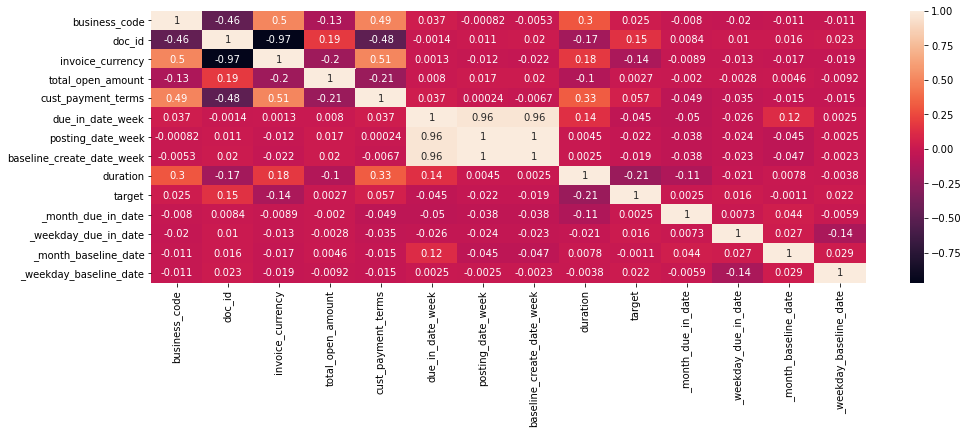

In [65]:
#plot heatmap of correlations
plt.figure(figsize = (16,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [66]:
#find correlation between target and features
train_set.corr()['target'][:].sort_values()

duration                    -0.207156
invoice_currency            -0.136344
due_in_date_week            -0.044604
posting_date_week           -0.021904
baseline_create_date_week   -0.019253
_month_baseline_date        -0.001144
_month_due_in_date           0.002504
total_open_amount            0.002695
_weekday_due_in_date         0.016457
_weekday_baseline_date       0.021592
business_code                0.024547
cust_payment_terms           0.057475
doc_id                       0.148061
target                       1.000000
Name: target, dtype: float64

In [67]:
train_set.isnull().sum()

business_code                    0
cust_number                      0
name_customer                    0
clear_date                       0
doc_id                           0
posting_date                     0
document_create_date.1           0
due_in_date                      0
invoice_currency                 0
document type                    0
total_open_amount                0
baseline_create_date             0
cust_payment_terms               0
due_in_date_week                 0
posting_date_week                0
baseline_create_date_week        0
duration                         0
target                           0
aging_bucket                 18294
_month_due_in_date               0
_weekday_due_in_date             0
_month_baseline_date             0
_weekday_baseline_date           0
dtype: int64

In [68]:
#extract features from above references and prepare for training and test
feature_columns = ['duration',
                   'doc_id',
                   'invoice_currency',
                   'posting_date_week',
                   'baseline_create_date_week',
                   'cust_payment_terms',
                   'total_open_amount'
                  ]
features = pd.DataFrame(train_set, columns=feature_columns)

val1 = pd.DataFrame(validation_set, columns=feature_columns)
val1_target = pd.DataFrame(validation_set, columns=['target'])

val2 = pd.DataFrame(test_set, columns=feature_columns)
val2_target = pd.DataFrame(test_set, columns=['target'])

In [69]:
#Random Forest model fit
rfr = RandomForestRegressor(random_state=5)
rfr.fit(features,train_set['target'])

RandomForestRegressor(random_state=5)

In [70]:
#predict from Linear model and view metrics score
predict = rfr.predict(features)
print(mean_squared_error(train_set['target'], predict))
print(r2_score(train_set['target'], predict))
print(mean_squared_error(train_set['target'], predict, squared=False))
predict = rfr.predict(val1)
print(mean_squared_error(val1_target, predict))
print(r2_score(val1_target, predict))
print(mean_squared_error(val1_target, predict, squared=False))
predict = rfr.predict(val2)
print(mean_squared_error(val2_target, predict))
print(r2_score(val2_target, predict))
print(mean_squared_error(val2_target, predict, squared=False))
predict.max()

13.405045735892605
0.9036478987064095
3.6612901736809396
39.04519009378664
0.2318557492661928
6.24861505405691
85.75053201953601
0.06501017087006322
9.260158315036305


100.8

In [71]:
#label encoding business_code and cust_payment_terms for test dataset
df2['business_code']= label_encoder.fit_transform(df2['business_code'])
df2['cust_payment_terms']= label_encoder.fit_transform(df2['cust_payment_terms'])
df2['invoice_currency']= label_encoder.fit_transform(df2['invoice_currency'])

In [72]:
#preparing test dataset and predict delay
final_test = pd.DataFrame(df2,columns=feature_columns)
df2['target'] = rfr.predict(final_test)
df2['target'].max()

54.47

In [73]:
#bin the delay for test dataset
bins = np.array([0,15,30,45,60,75])
df2['aging_bucket'] = pd.cut(df2.target, bins)
df2['aging_bucket'].value_counts()

(0, 15]     3889
(15, 30]     125
(30, 45]      50
(45, 60]       2
(60, 75]       0
Name: aging_bucket, dtype: int64

In [74]:
#final result after adding delay to due_in_date
df2['clear_date'] = df2['due_in_date']+df2['target'].map(timedelta)
df2[['clear_date','due_in_date','aging_bucket']]

,clear_date,due_in_date,aging_bucket
0,2020-03-20 05:02:24,2020-03-18,"(0.0, 15.0]"
1,2020-04-06 12:00:00,2020-04-05,"(0.0, 15.0]"
2,2020-04-17 10:19:12,2020-04-13,"(0.0, 15.0]"
3,2020-06-08 02:38:24,2020-06-19,NaN
4,2020-03-22 07:55:12,2020-03-17,"(0.0, 15.0]"
...,...,...,...
4331,2020-03-19 10:19:12,2020-03-18,"(0.0, 15.0]"
4332,2020-04-22 13:26:24,2020-04-16,"(0.0, 15.0]"
4333,2020-05-23 13:40:48,2020-05-22,"(0.0, 15.0]"
4334,2020-03-28 04:33:36,2020-03-24,"(0.0, 15.0]"
